In [66]:
import keras
from keras.applications import vgg16, inception_v3, resnet50, mobilenet

#Load the VGG model
# vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
# inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
# mobilenet_model = mobilenet.MobileNet(weights='imagenet')



PIL image size (224, 224)


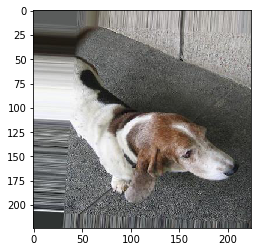

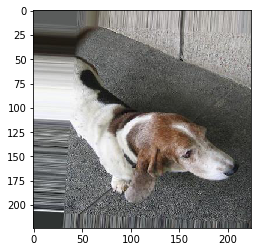

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


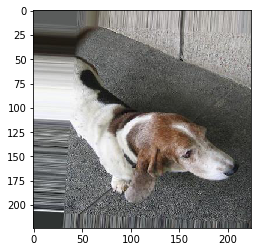

In [67]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
 
filename = 'preview/dog_0_3744.jpeg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
# original = load_img(filename)
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

## Pré-processing

In [64]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook
%matplotlib inline 

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# filename = 'MO444_dogs/train/02_0077.jpg'
# img = load_img(filename)
# x = img_to_array(img)
# x = x.reshape((1,) + x.shape)

# i = 0
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

paths = []        
base_dir = 'MO444_dogs/bichinhos/'
for file in os.listdir(base_dir):
    paths.append(os.path.join(base_dir, file))

for path in tqdm_notebook(paths):
     img = load_img(path)
     x = img_to_array(img)
     x = x.reshape((1,) + x.shape)
     if x.shape[1] <= x.shape[2]:
         a = x.shape[1]
         b = x.shape[1]
         x_r = x[:, :a, :b, :]
     else:
         a = x.shape[2]
         b = x.shape[2]
         x_r = x[:, :a, :b, :]
     i=0
     for batch in datagen.flow(x_r, batch_size=1, save_to_dir='preview', save_prefix='dog', save_format='jpeg'):
         i += 1
         if i > 20:
             break


HBox(children=(IntProgress(value=0, max=352), HTML(value='')))

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/p4w/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/p4w/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/p4w/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



## Pre-processing images

In [65]:
def get_crop_areas(h, w):
    center_x = h//2-(512//2)
    center_y = w//2-(512//2)
    return {
        'top-left': (0, 0, 512, 512),
        'bottom-right': (h-512, w-512, h, w),
        'bottom-left': (h-512, 0, h, 512),
        'top-right': (0, w-512, 512, w),
        'center-center': (center_x, center_y, center_x+512, center_y+512)
    }

## Predict models

In [68]:
# prepare the image for the VGG model
# processed_image = vgg16.preprocess_input(image_batch.copy())
processed_image = resnet50.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
# predictions = vgg_model.predict(processed_image)
predictions = resnet_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print(label)


NameError: name 'processed_image' is not defined